## Network scanning

Experiment setup:

- select one node and setup AP on one interface
- perform scanning from all nodes on all interfaces
- repeat for all nodes and all interfaces

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import display
import networkx as nx
from math import sqrt
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

import bokeh.plotting as bkh
bkh.output_notebook()

Loading BokehJS ...

Load scan data from `.csv`

In [35]:
# source = '../data/scan.csv'
source = '../data/scan_2017-08-04T13:00:46.185926.csv'
df = pd.DataFrame.from_csv(source)
df['signal'] = df['signal'].str.strip(' dBm').astype('float')
# df['label'] = df.apply(lambda x: '\n'.join([x['sta_dev'], str(x['signal'])]), axis=1)
df.head()

,bssid,freq,signal,ssid,sta,sta_dev,ap,ap_dev
0,64:66:b3:ce:21:dc,5240,-87.0,68,nuc11,w0,NaN,NaN
1,64:66:b3:ce:21:db,2437,-75.0,68-test,nuc11,w1,NaN,NaN
2,64:66:b3:ce:21:db,2437,-67.0,68-test,nuc11,w0,NaN,NaN
3,56:8b:3c:d0:48:b6,5200,-84.0,Intelligent-Mesh-5GHz,nuc11,w0,NaN,NaN
4,a0:cf:5b:3f:87:4e,5660,-64.0,TUB-Guest,nuc11,w0,NaN,NaN


Filter for own AP's (di

In [48]:
df_twist = df[df['ssid'] == 'twist-test']
df_twist = df_twist[df_twist['sta'].str.startswith('nuc')]
df_twist = df_twist[df_twist['ap'].str.startswith('nuc')]
df_twist

,bssid,freq,signal,ssid,sta,sta_dev,ap,ap_dev
667,02:f0:21:14:c6:21,5240,-75.0,twist-test,nuc13,w1,nuc10,phy1
668,02:f0:21:14:c6:21,5240,-79.0,twist-test,nuc13,w0,nuc10,phy1
705,02:f0:21:14:c6:21,5240,-77.0,twist-test,nuc6,w1,nuc10,phy1
1837,02:5d:60:77:86:72,5240,-84.0,twist-test,nuc12,w0,nuc10,phy0
1855,02:5d:60:77:86:72,5240,-69.0,twist-test,nuc13,w1,nuc10,phy0
1856,02:5d:60:77:86:72,5240,-75.0,twist-test,nuc13,w0,nuc10,phy0
1877,02:5d:60:77:86:72,5240,-83.0,twist-test,nuc4,w1,nuc10,phy0
1878,02:5d:60:77:86:72,5240,-77.0,twist-test,nuc4,w0,nuc10,phy0
1893,02:5d:60:77:86:72,5240,-68.0,twist-test,nuc6,w1,nuc10,phy0
4182,02:5d:60:77:7e:ff,5240,-90.0,twist-test,nuc4,w1,nuc11,phy0


Frequency 5240


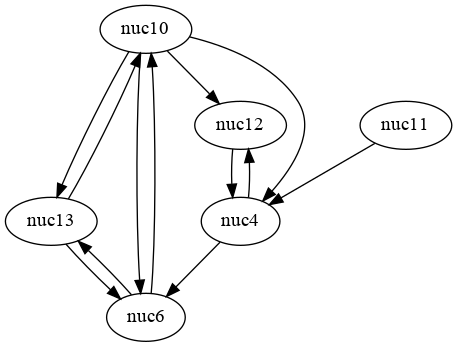

In [49]:
for freq in df_twist['freq'].unique():
    df = df_twist[freq == df_twist['freq']]
    
    G = nx.from_pandas_dataframe(
        df,
        'ap', 'sta',
        'signal',
        create_using=nx.DiGraph())
    print('Frequency {}'.format(freq))
    P = nx.nx_pydot.to_pydot(G)
    display.display(display.Image(P.create_png()))

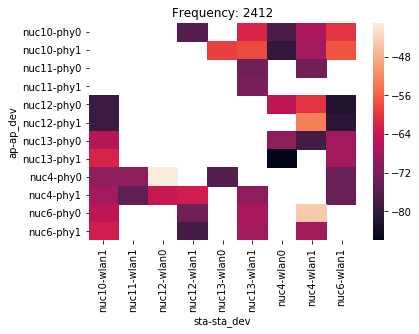

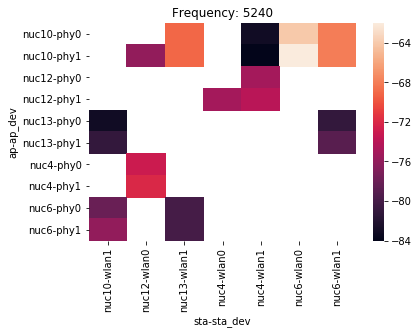

In [27]:
for freq in df_twist['freq'].unique():
    plt.figure()
    df = df_twist[freq == df_twist['freq']]
    signal = df.pivot_table(
        values='signal', index=['ap', 'ap_dev'], columns=['sta', 'sta_dev'])
    sns.heatmap(signal);
    plt.title('Frequency: {}'.format(freq))